In [1]:
# print('Hello')

In [3]:
# !pip install pandas numpy matplotlib seaborn scikit-learn jupyter

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Invistico_Airline.csv')
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [21]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [22]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

In [23]:
df["satisfaction"] = df["satisfaction"].map({
    "satisfied": 1,
    "dissatisfied": 0
})

In [24]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,0,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,0,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,0,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [25]:
corr_matrix = df.corr()

target_col = "satisfaction"
corr_with_target = corr_matrix[[target_col]].sort_values(by=target_col, ascending=False)

corr_with_target


,satisfaction
satisfaction,1.000000
Inflight entertainment,0.523496
Ease of Online booking,0.431772
Online support,0.390143
On-board service,0.352047
Online boarding,0.338147
Leg room service,0.304928
Checkin service,0.266179
Baggage handling,0.260347
Cleanliness,0.259330


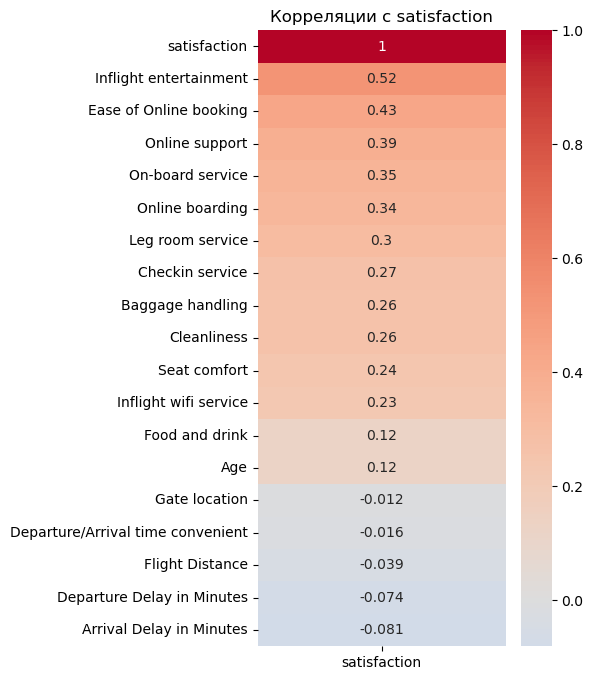

In [26]:
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target, annot=True, cmap="coolwarm", center=0)
plt.title(f"Корреляции с {target_col}")
plt.show()

In [18]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

Пропущенные значения:
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64


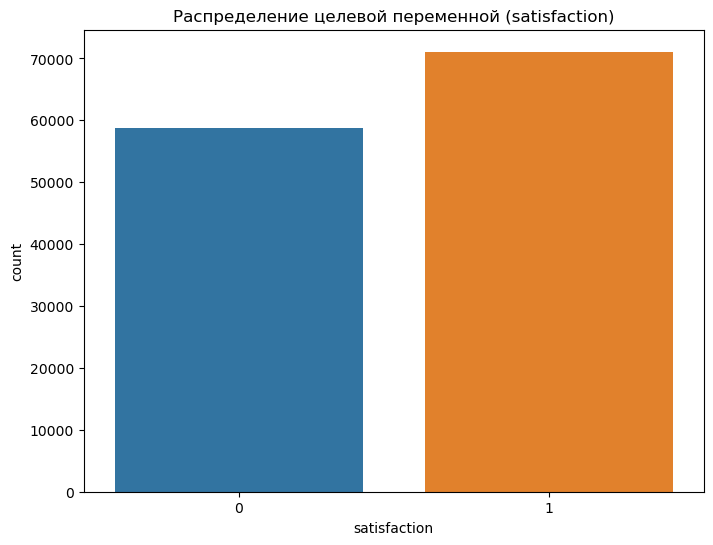

Распределение satisfaction:
1    0.547328
0    0.452672
Name: satisfaction, dtype: float64


In [27]:
print("Пропущенные значения:")
print(df.isnull().sum())

numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='satisfaction')
plt.title('Распределение целевой переменной (satisfaction)')
plt.show()

print("Распределение satisfaction:")
print(df['satisfaction'].value_counts(normalize=True))

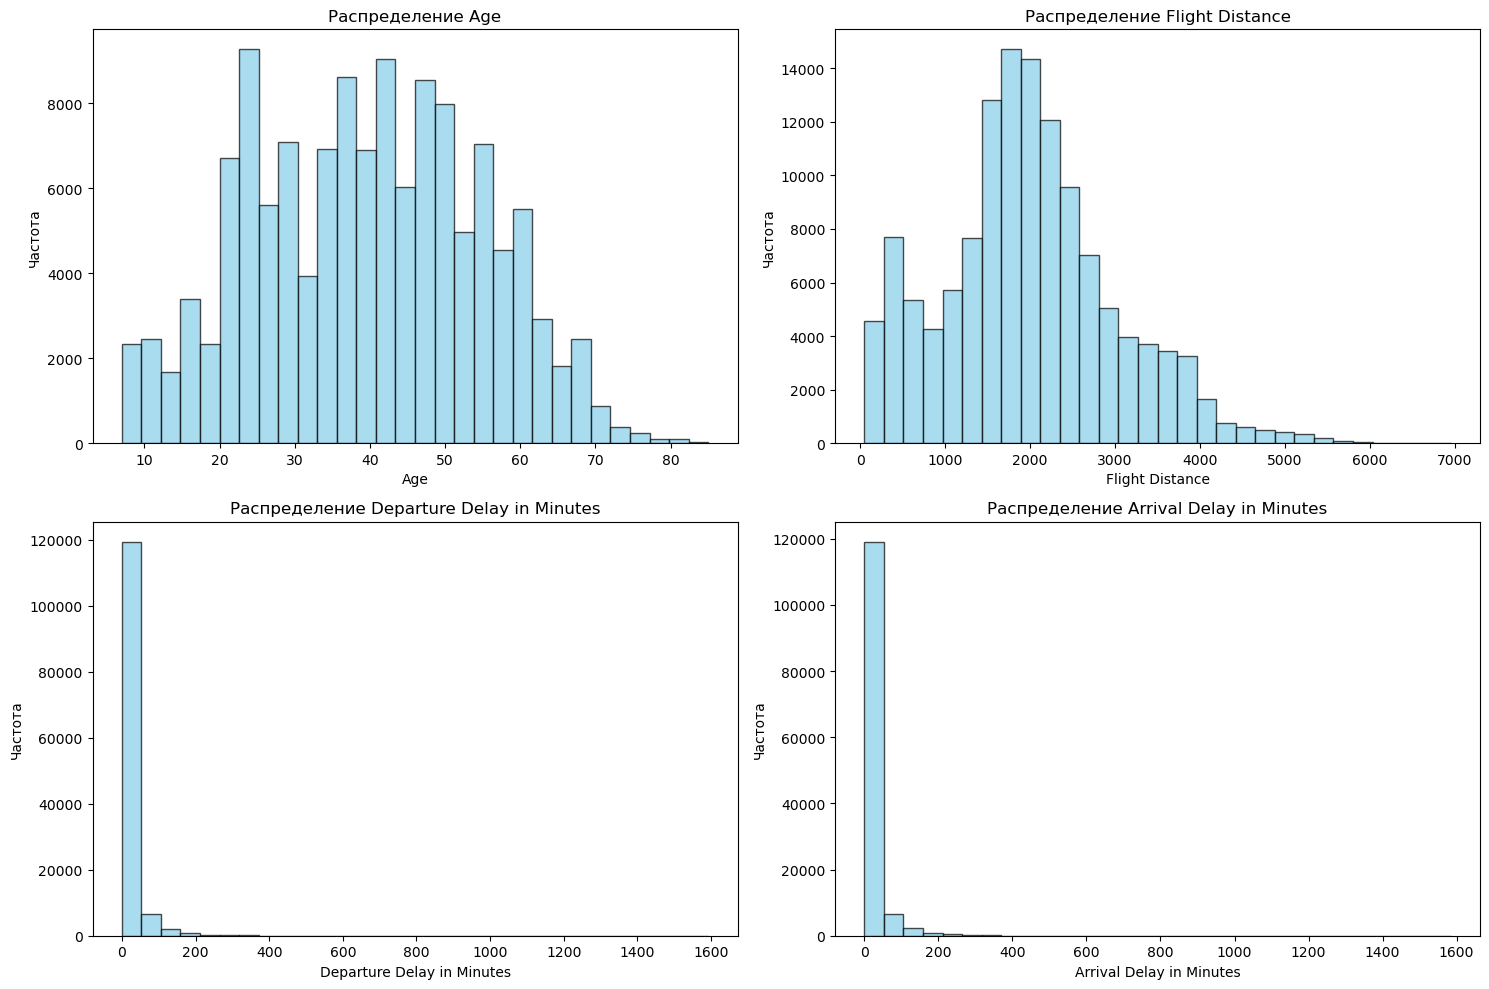

In [28]:
numerical_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Распределение {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Частота')

plt.tight_layout()
plt.show()

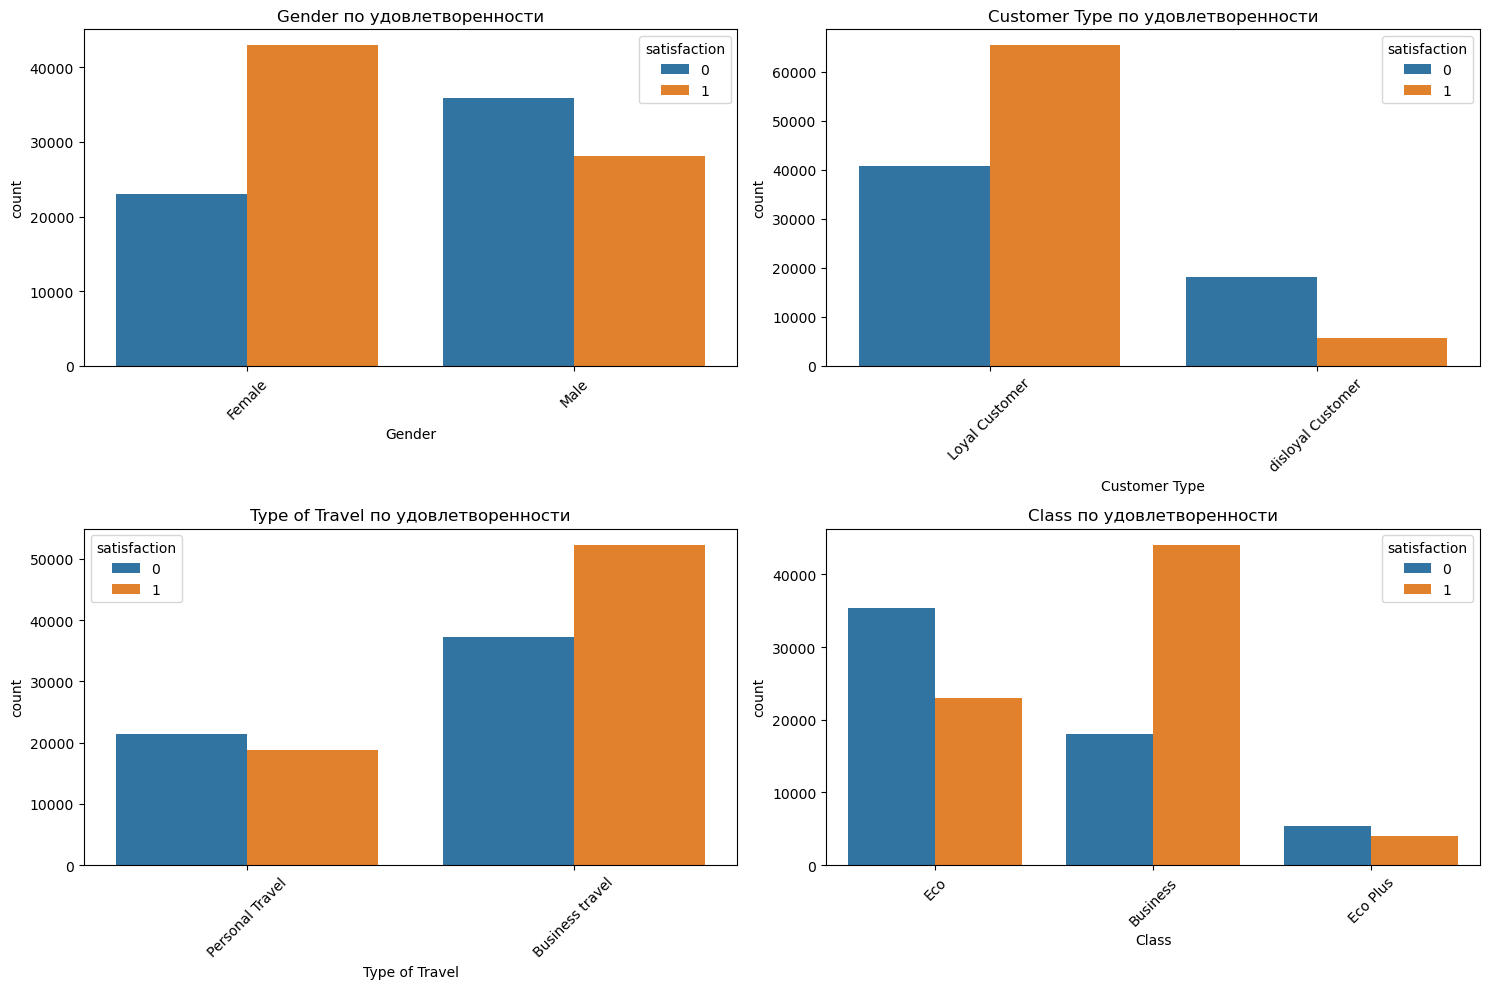

In [29]:
categorical_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue='satisfaction', ax=axes[i])
    axes[i].set_title(f'{feature} по удовлетворенности')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

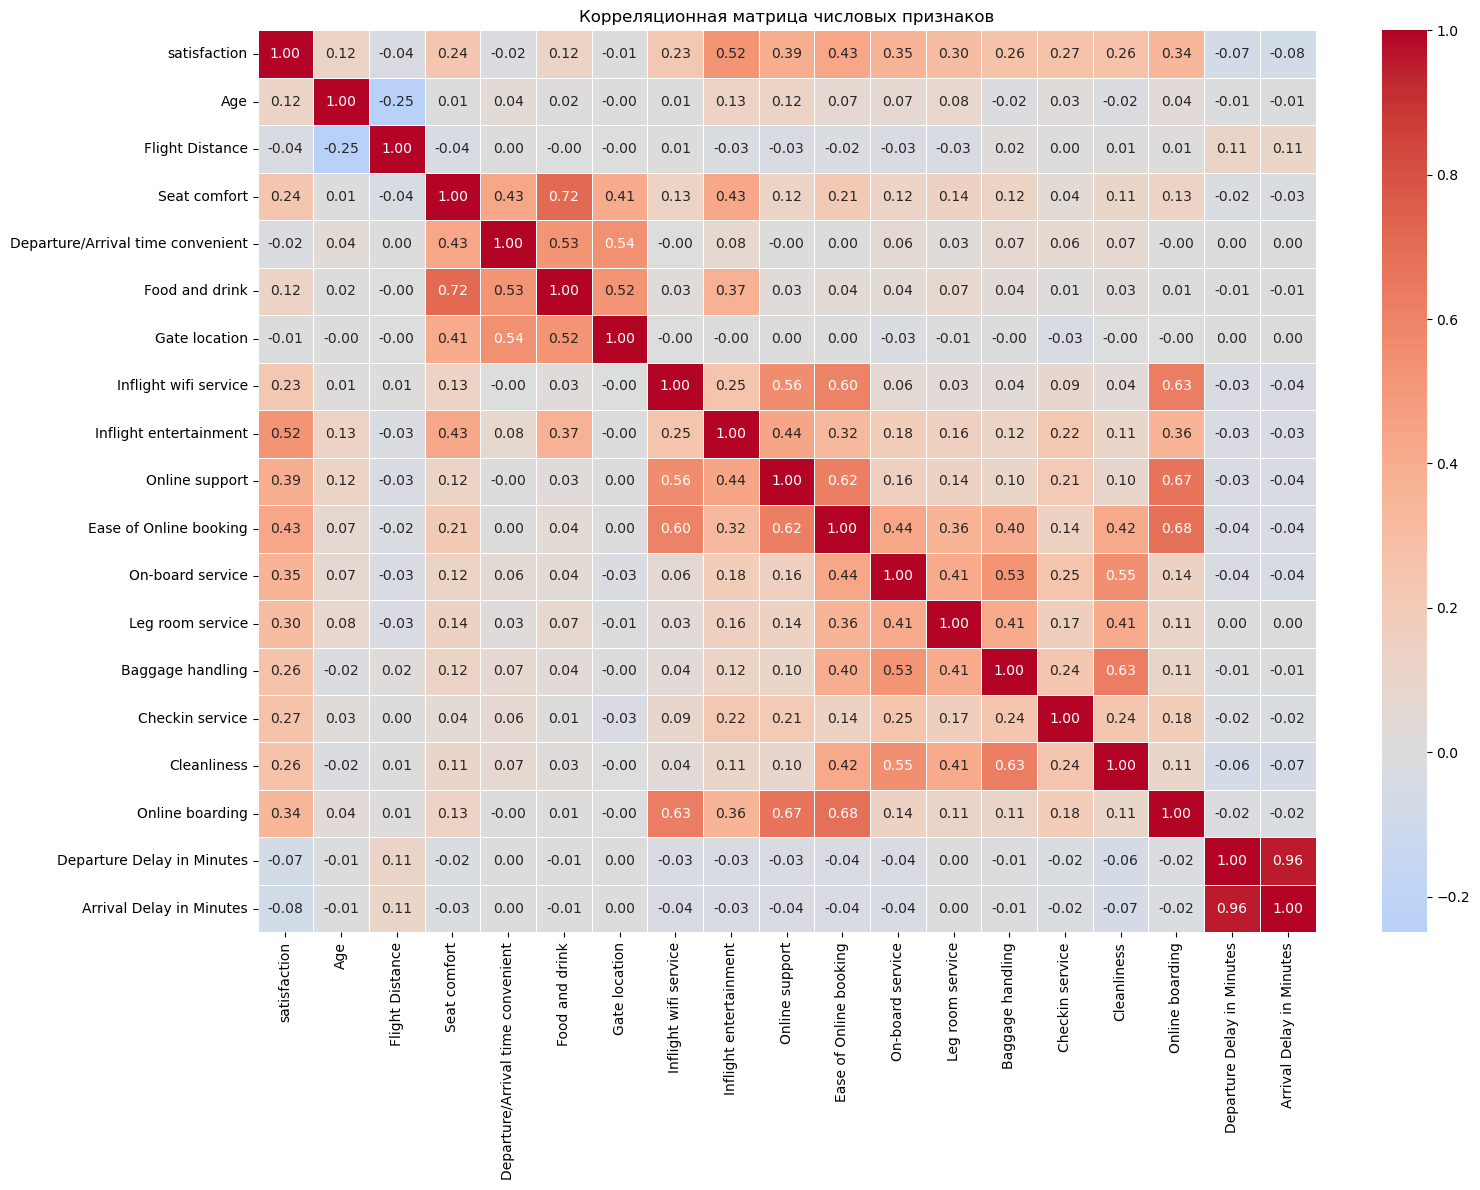

In [30]:
plt.figure(figsize=(16, 12))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5)
plt.title('Корреляционная матрица числовых признаков')
plt.tight_layout()
plt.show()

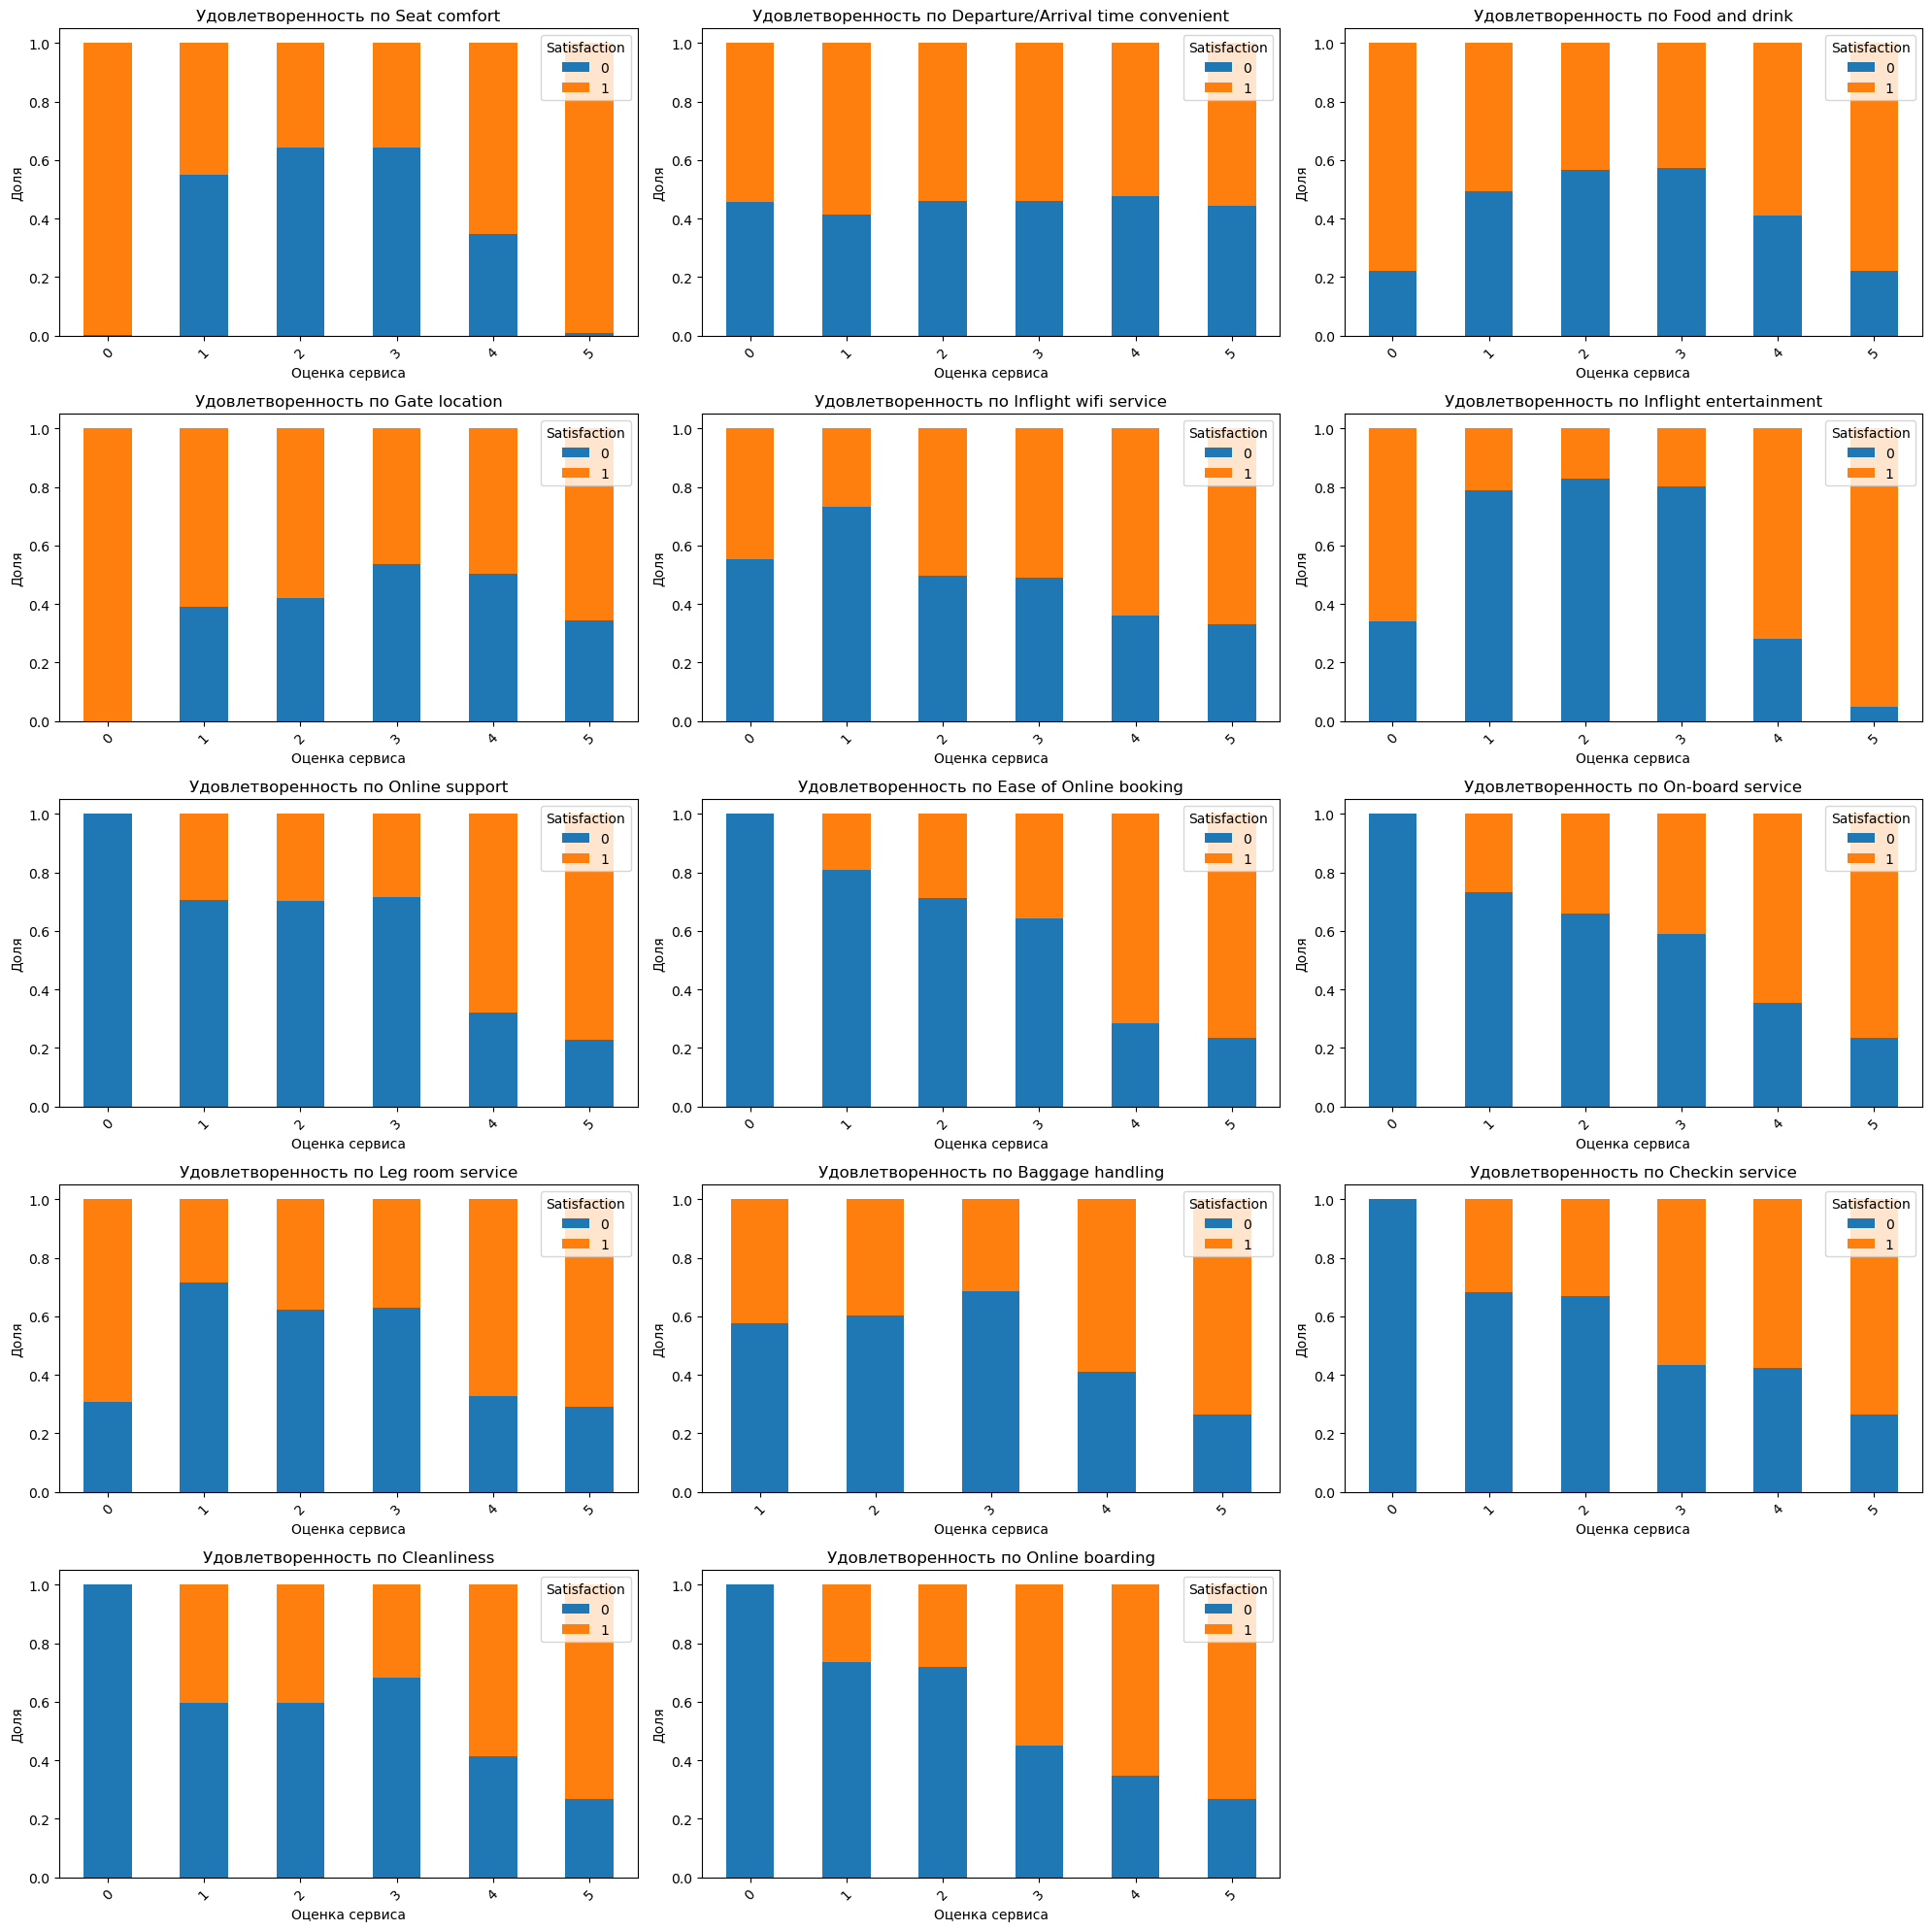

In [31]:
service_features = ['Seat comfort', 'Departure/Arrival time convenient', 
                   'Food and drink', 'Gate location', 'Inflight wifi service',
                   'Inflight entertainment', 'Online support', 
                   'Ease of Online booking', 'On-board service', 
                   'Leg room service', 'Baggage handling', 'Checkin service',
                   'Cleanliness', 'Online boarding']

fig, axes = plt.subplots(5, 3, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(service_features):
    satisfaction_by_service = df.groupby(feature)['satisfaction'].value_counts(normalize=True).unstack()
    satisfaction_by_service.plot(kind='bar', ax=axes[i], stacked=True)
    axes[i].set_title(f'Удовлетворенность по {feature}')
    axes[i].set_xlabel('Оценка сервиса')
    axes[i].set_ylabel('Доля')
    axes[i].legend(title='Satisfaction')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(len(service_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [32]:
label_encoders = {}
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Размер тренировочной выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер тренировочной выборки: (103904, 22)
Размер тестовой выборки: (25976, 22)


In [33]:
# 1. Логистическая регрессия
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 2. Случайный лес
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Предсказания
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# Вероятности для ROC-кривой
y_pred_proba_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

In [34]:
def plot_metrics_comparison(models_metrics):
    metrics_df = pd.DataFrame(models_metrics)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy
    axes[0,0].bar(metrics_df['Model'], metrics_df['Accuracy'], color=['skyblue', 'lightcoral'])
    axes[0,0].set_title('Accuracy сравнение')
    axes[0,0].set_ylabel('Accuracy')
    
    # ROC-AUC
    axes[0,1].bar(metrics_df['Model'], metrics_df['ROC-AUC'], color=['skyblue', 'lightcoral'])
    axes[0,1].set_title('ROC-AUC сравнение')
    axes[0,1].set_ylabel('ROC-AUC')
    
    # Время обучения
    axes[1,0].bar(metrics_df['Model'], metrics_df['Training Time'], color=['skyblue', 'lightcoral'])
    axes[1,0].set_title('Время обучения (сек)')
    axes[1,0].set_ylabel('Секунды')
    
    # Кросс-валидация
    axes[1,1].bar(metrics_df['Model'], metrics_df['CV Score'], color=['skyblue', 'lightcoral'])
    axes[1,1].set_title('Кросс-валидация (среднее)')
    axes[1,1].set_ylabel('Accuracy')
    
    plt.tight_layout()
    plt.show()



In [35]:
from time import time

models_metrics = []

In [36]:
start_time = time()
logreg_cv_scores = cross_val_score(logreg, X_train_scaled, y_train, cv=5)
logreg_cv_time = time() - start_time

models_metrics.append({
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_logreg),
    'Training Time': logreg_cv_time,
    'CV Score': logreg_cv_scores.mean()
})



In [37]:
start_time = time()
rf_cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
rf_cv_time = time() - start_time

models_metrics.append({
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_rf),
    'Training Time': rf_cv_time,
    'CV Score': rf_cv_scores.mean()
})


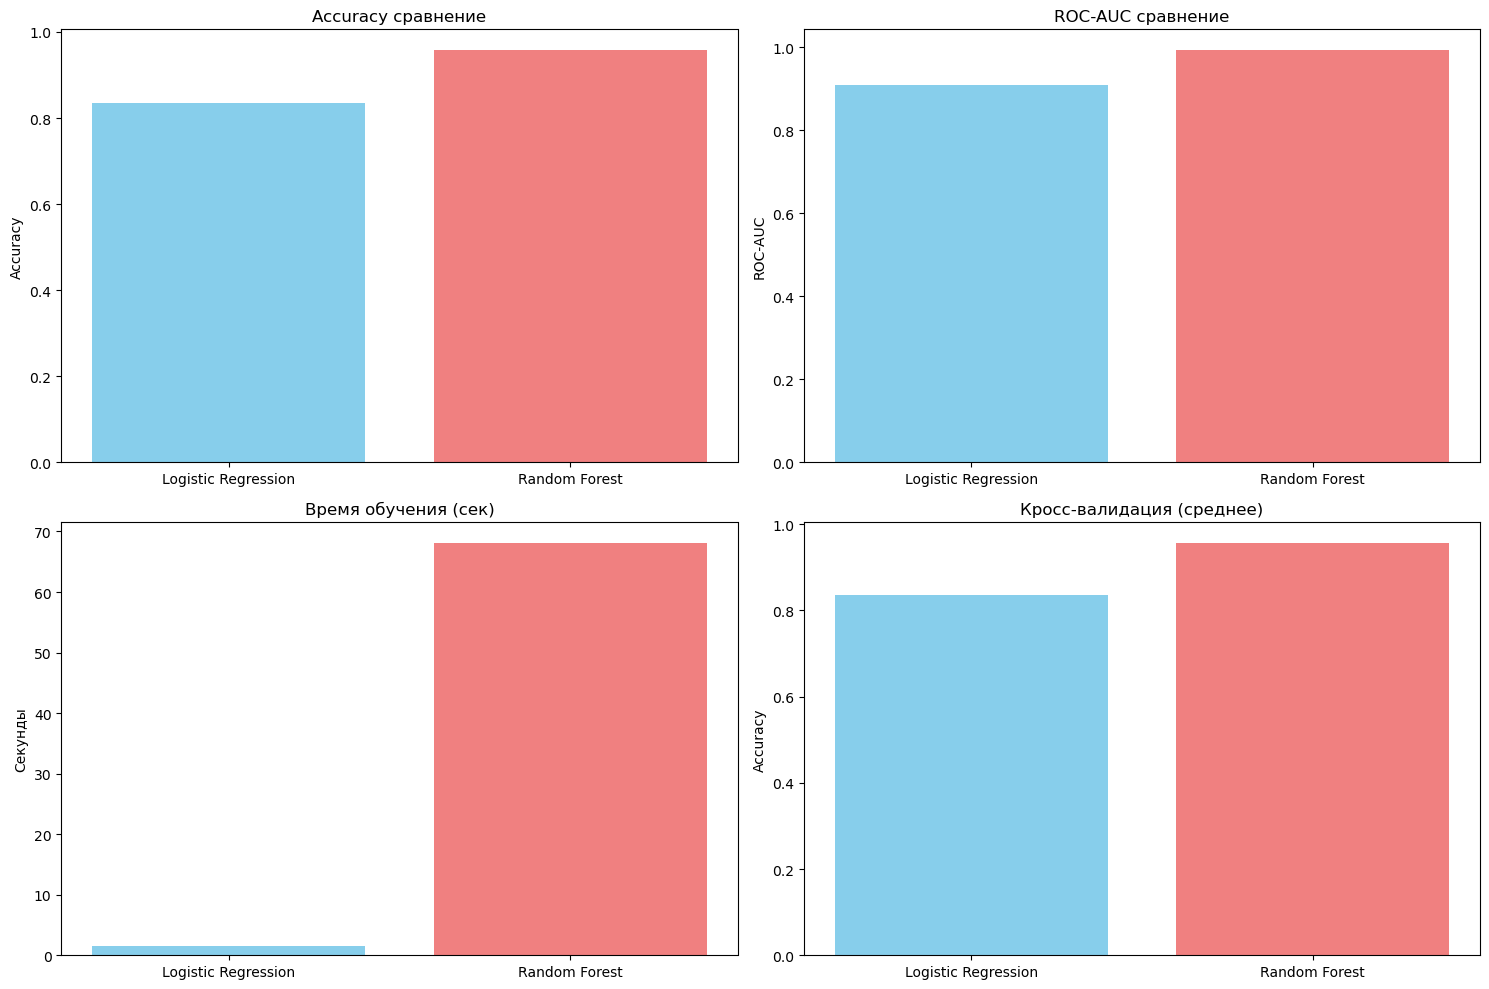

In [38]:
# Визуализация сравнения метрик
plot_metrics_comparison(models_metrics)

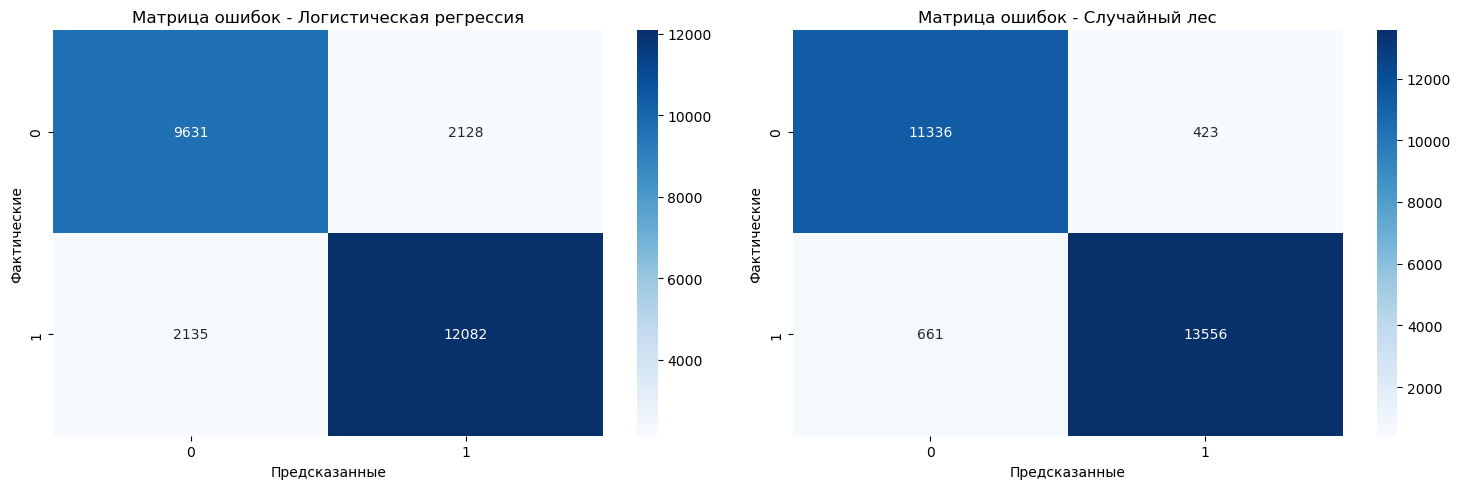

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Логистическая регрессия
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Матрица ошибок - Логистическая регрессия')
ax1.set_xlabel('Предсказанные')
ax1.set_ylabel('Фактические')

# Случайный лес
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Матрица ошибок - Случайный лес')
ax2.set_xlabel('Предсказанные')
ax2.set_ylabel('Фактические')

plt.tight_layout()
plt.show()

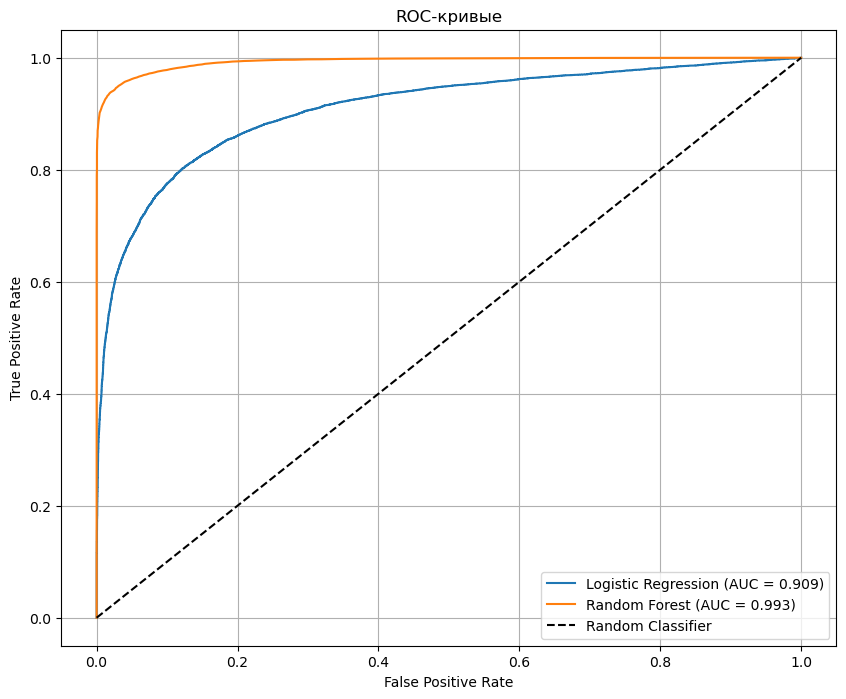

In [39]:
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_logreg):.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_pred_proba_rf):.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend()
plt.grid(True)
plt.show()

# Основные выводы:
## 1. По распределению данных можно заметить, что мужчины чаще плохо оценивают работу авикомпании --> возможно, стоит провести опрос, чтобы выявить ключевые неудобства.
## 2. Пассажиры эконом-класса гораздо чаще недовольны условиями --> следует сделать упор на улучшение условий данного типа билетов.
## 3. Больше всего на итоговую оценку влияют следующие факторы: Inflight entertainment, Ease of Online booking, Online support, On-board servic, Online boarding
## 4. По корреляционной матрице можно увидеть довольно высокую положительную корреляция между оценкой комфортабельности и качества еды и напитков. Возможно, стоит пересмотреть меню и качество еды, так как при долгом перелете это имеет значение для пассажиров.
## 5. Можно заметить, что гораздо чаще дают высокую оценку люди, совершающие бизнес поездку. Возможно, это зависит от  того, что люди путешествуют одни, без семьи. Следует провести дополнительный опрос среди тех, кто путешествует с семьей.